In [10]:
!pip install simpy xgboost

In [11]:
import simpy
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [12]:
ROLL_NUMBER = 102316022
np.random.seed(ROLL_NUMBER)
random.seed(ROLL_NUMBER)

In [13]:
def run_simulation(arrival_rate, service_rate, num_servers, sim_time=200):

    env = simpy.Environment()
    server = simpy.Resource(env, capacity=num_servers)
    waiting_times = []

    def patient(env):
        arrival_time = env.now

        with server.request() as request:
            yield request
            wait = env.now - arrival_time
            waiting_times.append(wait)

            service_time = np.random.exponential(1/service_rate)
            yield env.timeout(service_time)

    def patient_generator(env):
        while True:
            yield env.timeout(np.random.exponential(1/arrival_rate))
            env.process(patient(env))

    env.process(patient_generator(env))
    env.run(until=sim_time)

    if len(waiting_times) == 0:
        return 0

    return np.mean(waiting_times)

In [14]:
# Lower and Upper Bounds
arrival_lower, arrival_upper = 2, 10
service_lower, service_upper = 5, 15
server_lower, server_upper = 1, 5

In [6]:
data = []

for i in range(1000):

    arrival_rate = np.random.uniform(arrival_lower, arrival_upper)
    service_rate = np.random.uniform(service_lower, service_upper)
    servers = np.random.randint(server_lower, server_upper+1)

    avg_wait = run_simulation(arrival_rate, service_rate, servers)

    data.append([arrival_rate, service_rate, servers, avg_wait])

df = pd.DataFrame(data, columns=[
    "arrival_rate",
    "service_rate",
    "servers",
    "avg_waiting_time"
])

df.head()

,arrival_rate,service_rate,servers,avg_waiting_time
0,3.729566,12.191564,3,0.000253
1,6.245473,10.467915,2,0.010719
2,6.521118,11.669492,1,0.085560
3,9.530610,5.830562,2,0.343510
4,4.735032,5.709322,3,0.002087


In [7]:
csv_filename = f"simulation_data_{ROLL_NUMBER}.csv"
df.to_csv(csv_filename, index=False)

print(f"Dataset saved as {csv_filename}")

Dataset saved as simulation_data_102316022.csv


In [9]:
X = df.drop("avg_waiting_time", axis=1)
y = df["avg_waiting_time"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=ROLL_NUMBER
)

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)

    results.append([name, r2, mse, rmse, mae])

results_df = pd.DataFrame(
    results,
    columns=["Model", "R2 Score", "MSE", "RMSE", "MAE"]
)

results_df = results_df.sort_values(by="R2 Score", ascending=False)
results_df

,Model,R2 Score,MSE,RMSE,MAE
6,KNN,0.865073,1.791242,1.338373,0.325071
4,Extra Trees,0.800007,2.655037,1.629428,0.408599
1,Decision Tree,0.734792,3.520814,1.876383,0.420359
2,Random Forest,0.732053,3.557164,1.886045,0.462649
3,Gradient Boosting,0.667898,4.408864,2.099730,0.609317
7,XGBoost,0.580922,5.563533,2.358714,0.588849
0,Linear Regression,0.119478,11.689496,3.418990,1.750308
5,SVR,0.052027,12.584958,3.547528,0.700783


In [16]:
results_filename = f"model_comparison_{ROLL_NUMBER}.csv"
results_df.to_csv(results_filename, index=False)

print(f"Model comparison saved as {results_filename}")

Model comparison saved as model_comparison_102316022.csv


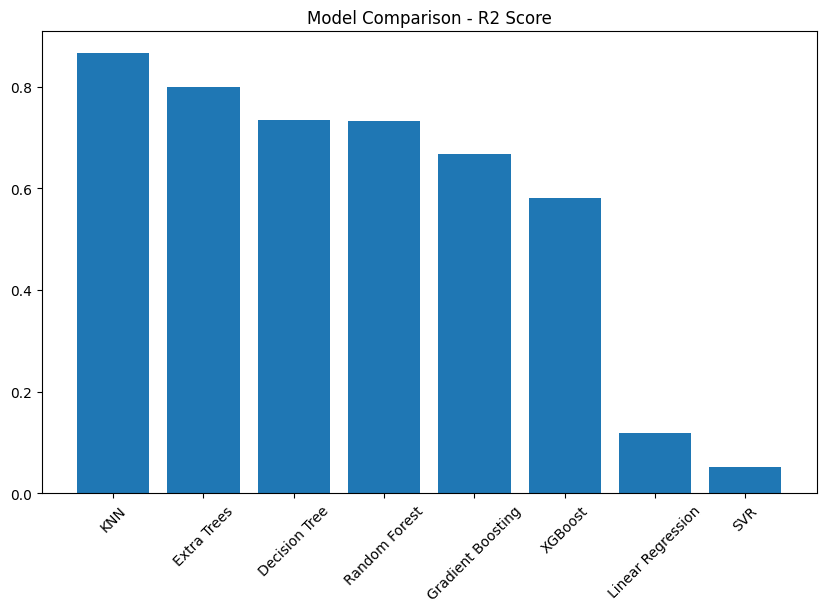

Saved r2_plot_102316022.png


In [17]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.xticks(rotation=45)
plt.title("Model Comparison - R2 Score")

r2_plot = f"r2_plot_{ROLL_NUMBER}.png"
plt.savefig(r2_plot, bbox_inches="tight", dpi=300)
plt.show()

print(f"Saved {r2_plot}")

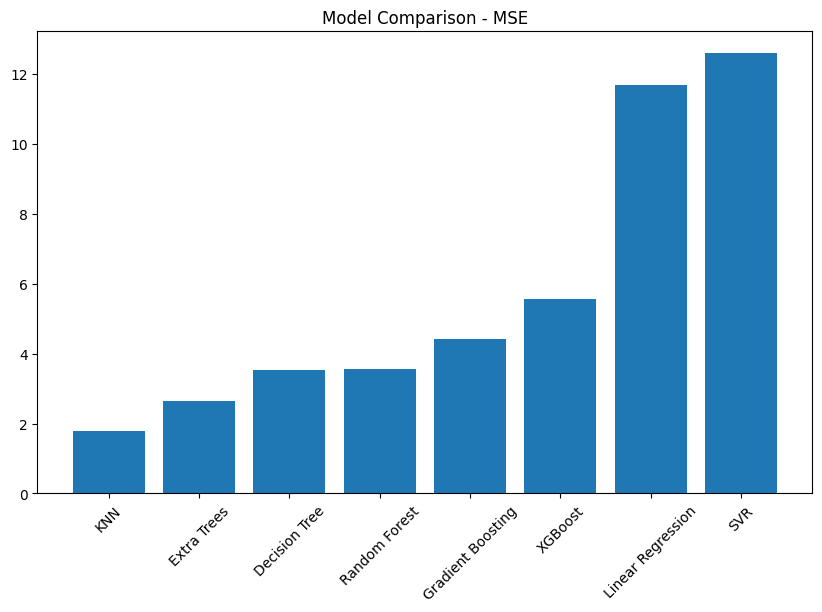

Saved mse_plot_102316022.png


In [18]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["MSE"])
plt.xticks(rotation=45)
plt.title("Model Comparison - MSE")

mse_plot = f"mse_plot_{ROLL_NUMBER}.png"
plt.savefig(mse_plot, bbox_inches="tight", dpi=300)
plt.show()

print(f"Saved {mse_plot}")

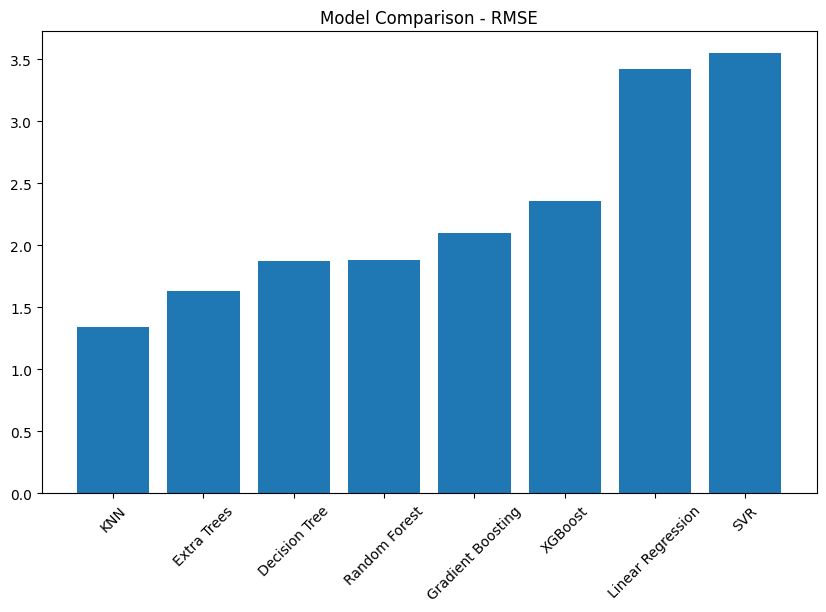

Saved rmse_plot_102316022.png


In [19]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.xticks(rotation=45)
plt.title("Model Comparison - RMSE")

rmse_plot = f"rmse_plot_{ROLL_NUMBER}.png"
plt.savefig(rmse_plot, bbox_inches="tight", dpi=300)
plt.show()

print(f"Saved {rmse_plot}")

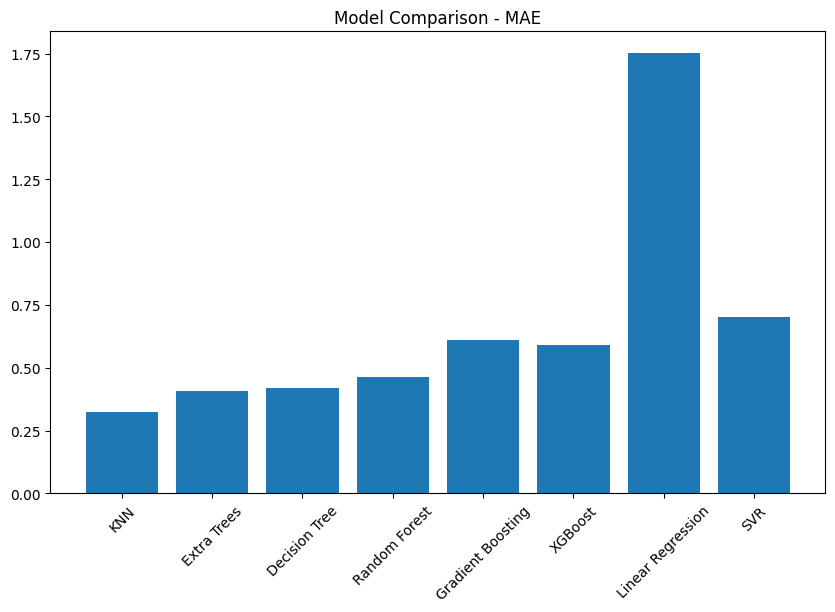

Saved mae_plot_102316022.png


In [20]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["MAE"])
plt.xticks(rotation=45)
plt.title("Model Comparison - MAE")

mae_plot = f"mae_plot_{ROLL_NUMBER}.png"
plt.savefig(mae_plot, bbox_inches="tight", dpi=300)
plt.show()

print(f"Saved {mae_plot}")